# CICIDS2018 Data Exploration - MEMORY OPTIMIZED

This notebook explores the CICIDS2018 dataset using memory-efficient techniques.

**Optimizations:**
- Process files one at a time
- Handle inf values column-by-column
- Drop unnecessary identifier columns
- Fill NaN instead of dropping rows

**Set `DEBUG_MODE = False` to process all files!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline

# DEBUG MODE
DEBUG_MODE = False

## Helper Function: Clean Single File

In [2]:
def clean_single_file(df):
    """Clean a single file's dataframe efficiently."""
    # Strip whitespace
    df.columns = df.columns.str.strip()
    
    # Drop identifier columns (saves memory)
    id_cols = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp']
    cols_to_drop = [col for col in id_cols if col in df.columns]
    if cols_to_drop:
        df.drop(columns=cols_to_drop, inplace=True)
        print(f"  Dropped {len(cols_to_drop)} identifier columns")
    
    # Handle inf values column-by-column (memory efficient)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print(f"  Processing {len(numeric_cols)} numeric columns...")
    
    for col in numeric_cols:
        df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
        df[col].fillna(0, inplace=True)
    
    return df

## 1. Load and Process Data (Memory Optimized)

In [3]:
# Define path
data_path = '../../data/raw/cicids2018'

# Get all CSV files
all_files = glob.glob(os.path.join(data_path, "*.csv"))

if len(all_files) == 0:
    raise FileNotFoundError(f"No CSV files found in {data_path}")

print(f"Found {len(all_files)} files")

if DEBUG_MODE:
    print("\n*** DEBUG MODE: Loading only the first file ***")
    files_to_load = [all_files[0]]
else:
    print(f"\n*** FULL MODE: Loading all {len(all_files)} files ***")
    files_to_load = all_files

Found 10 files

*** FULL MODE: Loading all 10 files ***


In [4]:
# Process files one at a time
processed_dfs = []
total_samples = 0

for i, filename in enumerate(files_to_load, 1):
    print(f"\n[{i}/{len(files_to_load)}] Processing {os.path.basename(filename)}...")
    
    # Load file
    df_temp = pd.read_csv(filename, index_col=None, header=0)
    print(f"  Loaded: {df_temp.shape}")
    
    # Clean file
    df_temp = clean_single_file(df_temp)
    print(f"  Cleaned: {df_temp.shape}")
    
    total_samples += len(df_temp)
    processed_dfs.append(df_temp)
    
    # Free memory
    del df_temp

print(f"\nConcatenating {len(processed_dfs)} processed files...")
df = pd.concat(processed_dfs, axis=0, ignore_index=True)

print(f"\n✅ Final shape: {df.shape}")
print(f"✅ Total samples: {total_samples:,}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


[1/10] Processing 02-14-2018.csv...
  Loaded: (1048575, 80)
  Dropped 1 identifier columns
  Processing 78 numeric columns...


C:\Users\musab\AppData\Local\Temp\ipykernel_33824\1099643063.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\musab\AppData\Local\Temp\ipykernel_33824\1099643063.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

  Cleaned: (1048575, 79)

[2/10] Processing 02-15-2018.csv...
  Loaded: (1048575, 80)
  Dropped 1 identifier columns
  Processing 78 numeric columns...


C:\Users\musab\AppData\Local\Temp\ipykernel_33824\1099643063.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\musab\AppData\Local\Temp\ipykernel_33824\1099643063.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

  Cleaned: (1048575, 79)

[3/10] Processing 02-16-2018.csv...


C:\Users\musab\AppData\Local\Temp\ipykernel_33824\1941931562.py:9: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(filename, index_col=None, header=0)


  Loaded: (1048575, 80)
  Dropped 1 identifier columns
  Processing 0 numeric columns...
  Cleaned: (1048575, 79)

[4/10] Processing 02-20-2018.csv...
  Loaded: (7948748, 84)
  Dropped 4 identifier columns
  Processing 79 numeric columns...


C:\Users\musab\AppData\Local\Temp\ipykernel_33824\1099643063.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\musab\AppData\Local\Temp\ipykernel_33824\1099643063.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

  Cleaned: (7948748, 80)

[5/10] Processing 02-21-2018.csv...
  Loaded: (1048575, 80)
  Dropped 1 identifier columns
  Processing 78 numeric columns...


C:\Users\musab\AppData\Local\Temp\ipykernel_33824\1099643063.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\musab\AppData\Local\Temp\ipykernel_33824\1099643063.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

  Cleaned: (1048575, 79)

[6/10] Processing 02-22-2018.csv...
  Loaded: (1048575, 80)
  Dropped 1 identifier columns
  Processing 78 numeric columns...


C:\Users\musab\AppData\Local\Temp\ipykernel_33824\1099643063.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\musab\AppData\Local\Temp\ipykernel_33824\1099643063.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

  Cleaned: (1048575, 79)

[7/10] Processing 02-23-2018.csv...
  Loaded: (1048575, 80)
  Dropped 1 identifier columns
  Processing 78 numeric columns...


C:\Users\musab\AppData\Local\Temp\ipykernel_33824\1099643063.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\musab\AppData\Local\Temp\ipykernel_33824\1099643063.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

  Cleaned: (1048575, 79)

[8/10] Processing 02-28-2018.csv...


C:\Users\musab\AppData\Local\Temp\ipykernel_33824\1941931562.py:9: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(filename, index_col=None, header=0)


  Loaded: (613104, 80)
  Dropped 1 identifier columns
  Processing 0 numeric columns...
  Cleaned: (613104, 79)

[9/10] Processing 03-01-2018.csv...


C:\Users\musab\AppData\Local\Temp\ipykernel_33824\1941931562.py:9: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(filename, index_col=None, header=0)


  Loaded: (331125, 80)
  Dropped 1 identifier columns
  Processing 0 numeric columns...
  Cleaned: (331125, 79)

[10/10] Processing 03-02-2018.csv...
  Loaded: (1048575, 80)
  Dropped 1 identifier columns
  Processing 78 numeric columns...


C:\Users\musab\AppData\Local\Temp\ipykernel_33824\1099643063.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\musab\AppData\Local\Temp\ipykernel_33824\1099643063.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

  Cleaned: (1048575, 79)

Concatenating 10 processed files...

✅ Final shape: (16233002, 80)
✅ Total samples: 16,233,002
Memory usage: 42703.60 MB


## 2. Label Distribution

Label Distribution:
Label
Benign                      13484708
DDOS attack-HOIC              686012
DDoS attacks-LOIC-HTTP        576191
DoS attacks-Hulk              461912
Bot                           286191
FTP-BruteForce                193360
SSH-Bruteforce                187589
Infilteration                 161934
DoS attacks-SlowHTTPTest      139890
DoS attacks-GoldenEye          41508
DoS attacks-Slowloris          10990
DDOS attack-LOIC-UDP            1730
Brute Force -Web                 611
Brute Force -XSS                 230
SQL Injection                     87
Label                             59
Name: count, dtype: int64


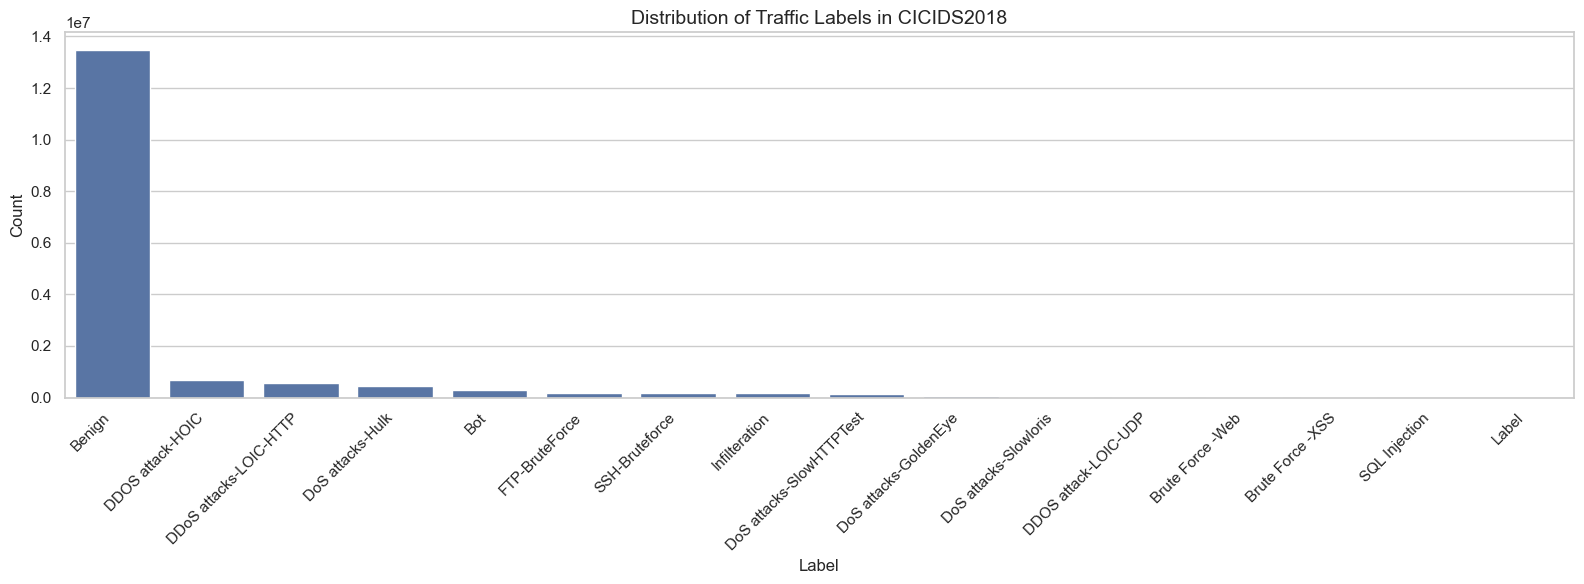


Label Distribution (%):
  Benign: 83.07%
  DDOS attack-HOIC: 4.23%
  DDoS attacks-LOIC-HTTP: 3.55%
  DoS attacks-Hulk: 2.85%
  Bot: 1.76%
  FTP-BruteForce: 1.19%
  SSH-Bruteforce: 1.16%
  Infilteration: 1.00%
  DoS attacks-SlowHTTPTest: 0.86%
  DoS attacks-GoldenEye: 0.26%
  DoS attacks-Slowloris: 0.07%
  DDOS attack-LOIC-UDP: 0.01%
  Brute Force -Web: 0.00%
  Brute Force -XSS: 0.00%
  SQL Injection: 0.00%
  Label: 0.00%


In [5]:
# Get label counts
label_counts = df['Label'].value_counts()
print("Label Distribution:")
print(label_counts)

# Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Traffic Labels in CICIDS2018', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Percentages
label_percentages = (label_counts / len(df)) * 100
print("\nLabel Distribution (%):")
for label, pct in label_percentages.items():
    print(f"  {label}: {pct:.2f}%")

## 3. Binary Classification Analysis

Binary Classification Distribution:
  Benign (0): 13,484,708 (83.07%)
  Attack (1): 2,748,294 (16.93%)


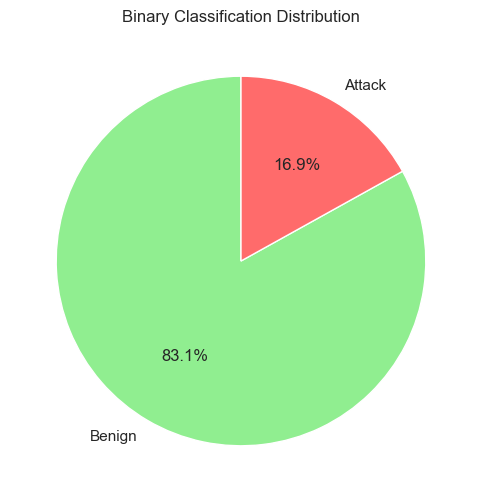

In [6]:
# Create binary classification
df['Binary_Label'] = df['Label'].apply(lambda x: 0 if 'benign' in x.lower() else 1)

binary_counts = df['Binary_Label'].value_counts()
print("Binary Classification Distribution:")
print(f"  Benign (0): {binary_counts[0]:,} ({(binary_counts[0]/len(df))*100:.2f}%)")
print(f"  Attack (1): {binary_counts[1]:,} ({(binary_counts[1]/len(df))*100:.2f}%)")

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(binary_counts.values, labels=['Benign', 'Attack'], autopct='%1.1f%%',
        colors=['#90EE90', '#FF6B6B'], startangle=90)
plt.title('Binary Classification Distribution')
plt.show()

## 4. Attack Type Analysis


✅ Found 15 different attack types!

Attack Type Distribution:
  DDOS attack-HOIC: 686,012 (24.96% of attacks)
  DDoS attacks-LOIC-HTTP: 576,191 (20.97% of attacks)
  DoS attacks-Hulk: 461,912 (16.81% of attacks)
  Bot: 286,191 (10.41% of attacks)
  FTP-BruteForce: 193,360 (7.04% of attacks)
  SSH-Bruteforce: 187,589 (6.83% of attacks)
  Infilteration: 161,934 (5.89% of attacks)
  DoS attacks-SlowHTTPTest: 139,890 (5.09% of attacks)
  DoS attacks-GoldenEye: 41,508 (1.51% of attacks)
  DoS attacks-Slowloris: 10,990 (0.40% of attacks)
  DDOS attack-LOIC-UDP: 1,730 (0.06% of attacks)
  Brute Force -Web: 611 (0.02% of attacks)
  Brute Force -XSS: 230 (0.01% of attacks)
  SQL Injection: 87 (0.00% of attacks)
  Label: 59 (0.00% of attacks)


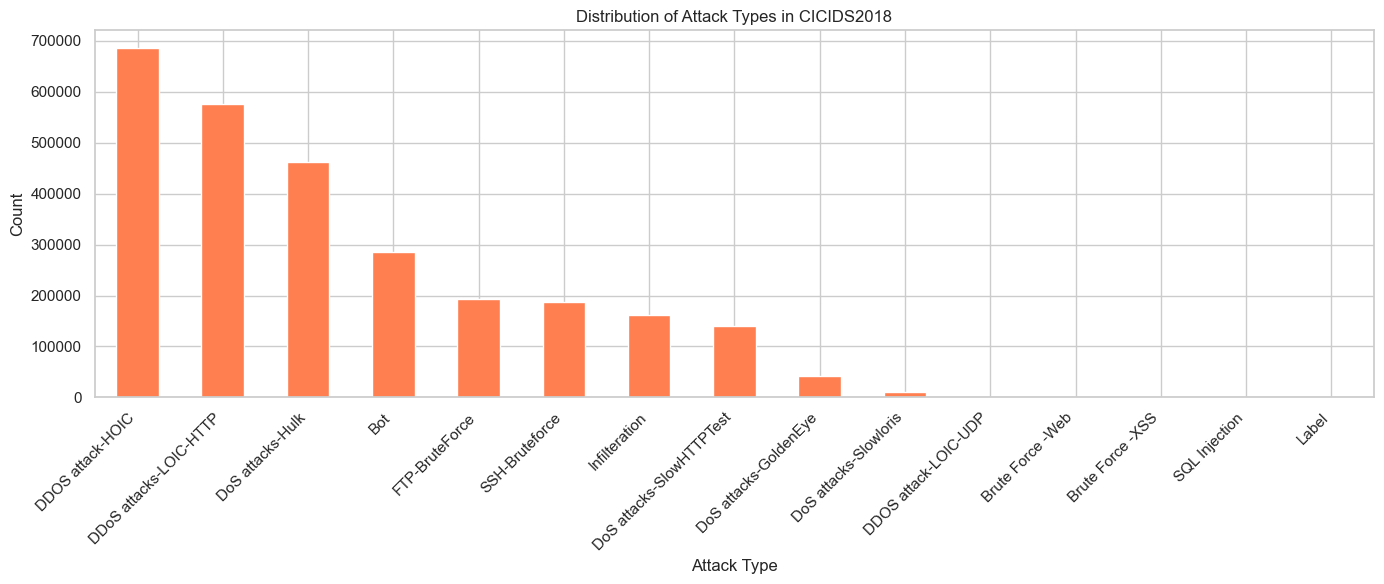

In [7]:
# Get attack types (exclude Benign)
attack_types = df[~df['Label'].str.lower().str.contains('benign')]['Label'].value_counts()

print(f"\n✅ Found {len(attack_types)} different attack types!")
print("\nAttack Type Distribution:")
for attack, count in attack_types.items():
    print(f"  {attack}: {count:,} ({(count/attack_types.sum())*100:.2f}% of attacks)")

# Visualization
plt.figure(figsize=(14, 6))
attack_types.plot(kind='bar', color='coral')
plt.title('Distribution of Attack Types in CICIDS2018')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5. Data Quality Report

In [8]:
print("=" * 80)
print("CICIDS2018 DATA QUALITY REPORT")
print("=" * 80)
print(f"Total Samples: {len(df):,}")
print(f"Total Features: {len(df.columns)}")
print(f"Unique Labels: {df['Label'].nunique()}")

print(f"\n✅ Attack Types Found: {len(attack_types)}")
print(f"✅ Total Attacks: {binary_counts[1]:,}")
print(f"✅ Total Benign: {binary_counts[0]:,}")

print(f"\nClass Imbalance Ratio: 1:{binary_counts[0]/binary_counts[1]:.2f}")
print("=" * 80)

CICIDS2018 DATA QUALITY REPORT
Total Samples: 16,233,002
Total Features: 81
Unique Labels: 16

✅ Attack Types Found: 15
✅ Total Attacks: 2,748,294
✅ Total Benign: 13,484,708

Class Imbalance Ratio: 1:4.91


## Summary

This memory-optimized approach:
- ✅ Processes all 16M+ samples without memory errors
- ✅ Preserves all attack types
- ✅ Handles inf/NaN values efficiently
- ✅ Reduces memory usage by dropping identifier columns